The point of this file is to create a graphic that verifies that the data from cleaning the data for our new models is correct. See data_clean/cleans_minimal.py

In [858]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon, Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import math
import subprocess as sub

In [859]:
datalog_DIR = '../../data/'
figure_DIR = '../../figures/'

In [860]:
#Throw away old trajectory images created

#p = sub.Popen(['pwd'],stdout=sub.PIPE,stderr=sub.PIPE)
#output, errors = p.communicate()

#p = sub.Popen(['rm ' + figure_DIR + 'bounceAngleVerification*'],stdout=sub.PIPE,stderr=sub.PIPE)
#output, errors = p.communicate()21

## Import data

In [861]:
#Import cleaned data
datalogFile = datalog_DIR + 'results.csv'
df = pd.read_csv(datalogFile, sep=',')
df.head()

,Unnamed: 0,Time,ID,X,Y,Yaw,ResetID,checkCorrectness,NumberOfWalls,WallId(s),...,in_angle6,residuals_in_angle6,in_angle7,residuals_in_angle7,in_angle8,residuals_in_angle8,in_angle9,residuals_in_angle9,in_angle10,residuals_in_angle10
0,0,0.001,0,0.0,0.0,0.0,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.002,0,0.0,0.0,0.0,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.003,0,0.0,0.0,0.0,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.004,0,0.0,0.0,0.0,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.005,0,0.0,0.0,0.0,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [862]:
#Import enclosure data
datalogFile = datalog_DIR + 'boundaryDescription.txt'
boundary_df = pd.read_csv(datalogFile, sep=',')
boundary_df.head()

,name,X,Y,Z,Roll,Pitch,Yaw,sizeX,sizeY,sizeZ
0,rail01,0.56355,0.00000,0.03175,0,0,0.00000,0.01905,1.12713,0.0889
1,rail02,0.00000,0.56356,0.03175,0,0,1.57000,0.01905,1.15250,0.0889
2,rail03,-0.56355,0.00000,0.03175,0,0,3.14000,0.01905,1.12713,0.0889
3,rail04,0.00000,-0.56356,0.03175,0,0,-1.57319,0.01905,1.15250,0.0889


## Find a few in row examples

In [863]:
NUMBER_OF_EXAMPLES = 8

In [864]:
indexes = []
for i in df.index:
    if df.at[i, 'NumberOfWalls'] > 0 and df.at[i-1, 'NumberOfWalls'] == 0 and len(indexes) < NUMBER_OF_EXAMPLES:
        indexes.append(i)
indexes

[1880, 4965, 7398, 10817, 11225, 14097, 16411, 16659]

In [865]:
POINTS_TO_TRACK = 100 #How many points after and before the point we are looking at to draw in the figure

In [866]:
rows = []
for i in range(NUMBER_OF_EXAMPLES):
    rows.append(range(indexes[i]-POINTS_TO_TRACK,indexes[i]+POINTS_TO_TRACK))
rows

[range(1780, 1980),
 range(4865, 5065),
 range(7298, 7498),
 range(10717, 10917),
 range(11125, 11325),
 range(13997, 14197),
 range(16311, 16511),
 range(16559, 16759)]

In [867]:
df_in_angle = df.iloc[np.r_[rows].flatten()]
df_in_angle.head()

,Unnamed: 0,Time,ID,X,Y,Yaw,ResetID,checkCorrectness,NumberOfWalls,WallId(s),...,in_angle6,residuals_in_angle6,in_angle7,residuals_in_angle7,in_angle8,residuals_in_angle8,in_angle9,residuals_in_angle9,in_angle10,residuals_in_angle10
1780,1780,1.781,0,0.251924,0.448152,0.014386,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1781,1781,1.782,0,0.252149,0.448562,0.014461,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1782,1782,1.783,0,0.252372,0.448970,0.014541,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1783,1783,1.784,0,0.252595,0.449378,0.014622,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1784,1784,1.785,0,0.252814,0.449781,0.014709,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [868]:
#Add a label to each row for the corresponding ranges
for i in range(NUMBER_OF_EXAMPLES):
    local_range = rows[i]
    df_in_angle.loc[local_range, 'id'] = int(i)
df_in_angle.head()

,Unnamed: 0,Time,ID,X,Y,Yaw,ResetID,checkCorrectness,NumberOfWalls,WallId(s),...,residuals_in_angle6,in_angle7,residuals_in_angle7,in_angle8,residuals_in_angle8,in_angle9,residuals_in_angle9,in_angle10,residuals_in_angle10,id
1780,1780,1.781,0,0.251924,0.448152,0.014386,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1781,1781,1.782,0,0.252149,0.448562,0.014461,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1782,1782,1.783,0,0.252372,0.448970,0.014541,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1783,1783,1.784,0,0.252595,0.449378,0.014622,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1784,1784,1.785,0,0.252814,0.449781,0.014709,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [869]:
df.iloc[1880]

Unnamed: 0                          1880
Time                               1.881
ID                                     0
X                               0.273929
Y                               0.493964
Yaw                            0.0203294
ResetID                                1
checkCorrectness                       1
NumberOfWalls                          1
WallId(s)                              2
in_angle1                        1.12221
residuals_in_angle1                   []
in_angle2                        1.04643
residuals_in_angle2     [3.83378987e-05]
in_angle3                       0.936822
residuals_in_angle3          [0.0002644]
in_angle4                       0.862063
residuals_in_angle4         [0.00049416]
in_angle5                        0.86614
residuals_in_angle5          [0.0004961]
in_angle6                       0.908546
residuals_in_angle6         [0.00104352]
in_angle7                       0.963039
residuals_in_angle7         [0.00271051]
in_angle8       

## Create figure for inrow

In [870]:
boundary_df.head()

,name,X,Y,Z,Roll,Pitch,Yaw,sizeX,sizeY,sizeZ
0,rail01,0.56355,0.00000,0.03175,0,0,0.00000,0.01905,1.12713,0.0889
1,rail02,0.00000,0.56356,0.03175,0,0,1.57000,0.01905,1.15250,0.0889
2,rail03,-0.56355,0.00000,0.03175,0,0,3.14000,0.01905,1.12713,0.0889
3,rail04,0.00000,-0.56356,0.03175,0,0,-1.57319,0.01905,1.15250,0.0889


0.554025 0.563565 -1.17713 -0.08155 0.0
-0.5762574023013896 0.5735438802469858 -1.2025000000000001 -0.08155 89.95437383553924
-0.5549225755211751 -0.5635491152270012 -1.17713 -0.08155 179.9087476710785
0.5762711488547185 -0.5744643255796864 -1.2025000000000001 -0.08155 -90.13714737218598


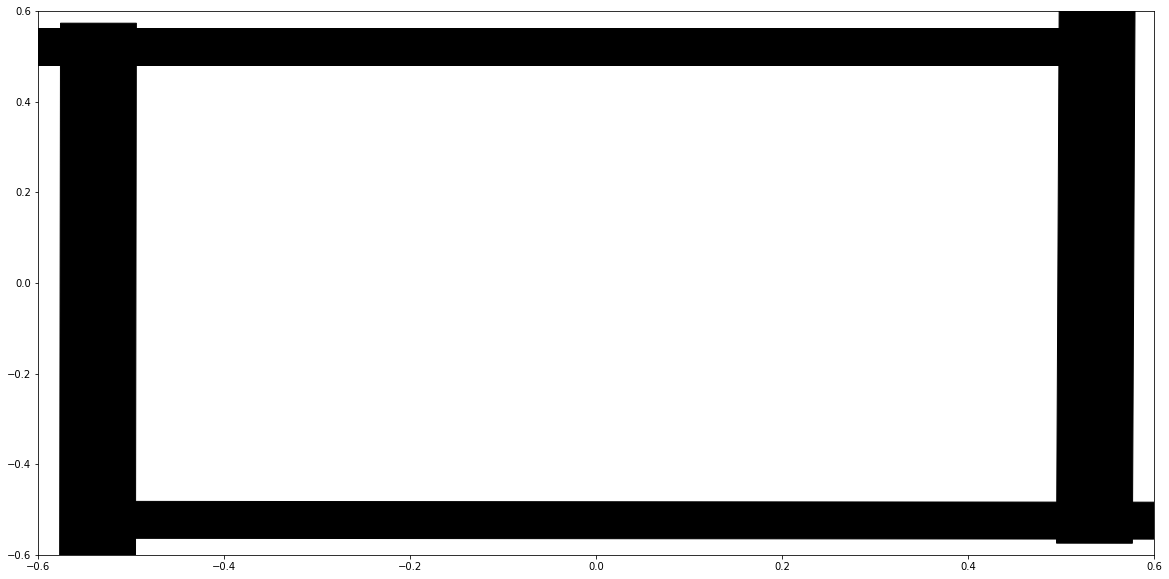

In [874]:
rectangles = []

for j in boundary_df.index:
    x_l = boundary_df.at[j,'X'] - (boundary_df.at[j,'sizeX']/2) * math.cos(boundary_df.at[j,'Yaw']) - (boundary_df.at[j,'sizeY']/2) * math.sin(boundary_df.at[j,'Yaw']) 
    y_l = boundary_df.at[j,'Y'] + (boundary_df.at[j,'sizeY']/2) * math.cos(boundary_df.at[j,'Yaw']) + (boundary_df.at[j,'sizeX']/2) * math.sin(boundary_df.at[j,'Yaw']) 
    width = -boundary_df.at[j,'sizeY'] - 0.100/2
    height = -boundary_df.at[j,'sizeX'] - 0.125/2
    angle = np.rad2deg(boundary_df.at[j,'Yaw'])
    print(x_l,y_l,width,height,angle)
    rect = Rectangle((x_l,y_l),width,height,angle=angle,color='Black')
    rectangles.append(rect)
fig, ax = plt.subplots(figsize=(20,10))
for rect in rectangles:
    ax.add_patch(rect)
plt.xlim([-.6,.6])
plt.ylim([-.6,.6])
plt.show()

0.554025 0.563565 -1.12713 -0.07455 0.0
-0.5762574023013896 0.5735438802469858 -1.1525 -0.07455 89.95437383553924
-0.5549225755211751 -0.5635491152270012 -1.12713 -0.07455 179.9087476710785
0.5762711488547185 -0.5744643255796864 -1.1525 -0.07455 -90.13714737218598


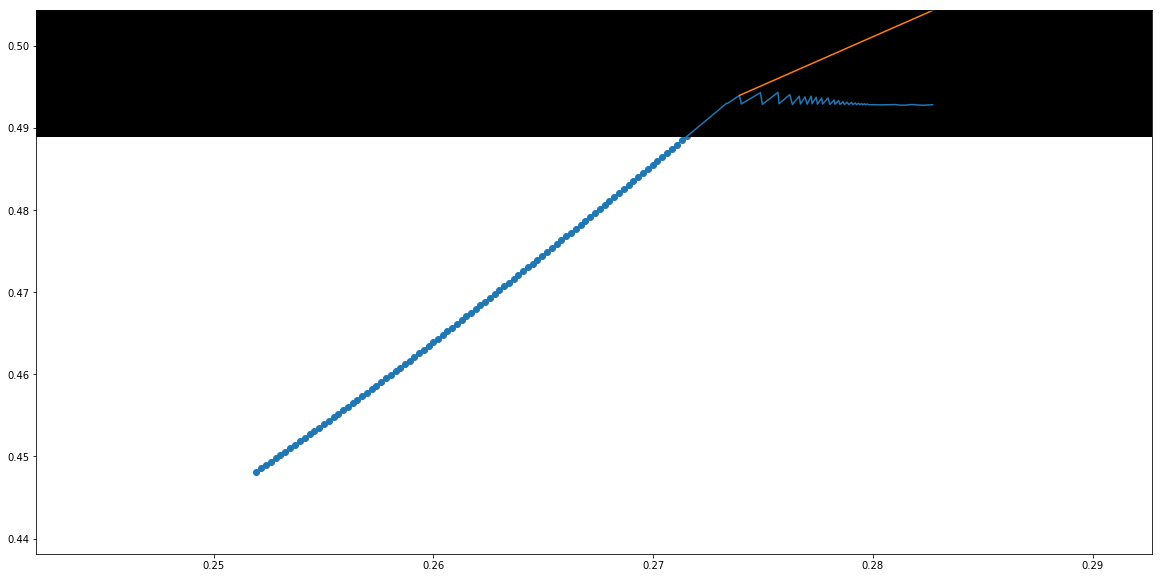

0.554025 0.563565 -1.12713 -0.07455 0.0
-0.5762574023013896 0.5735438802469858 -1.1525 -0.07455 89.95437383553924
-0.5549225755211751 -0.5635491152270012 -1.12713 -0.07455 179.9087476710785
0.5762711488547185 -0.5744643255796864 -1.1525 -0.07455 -90.13714737218598


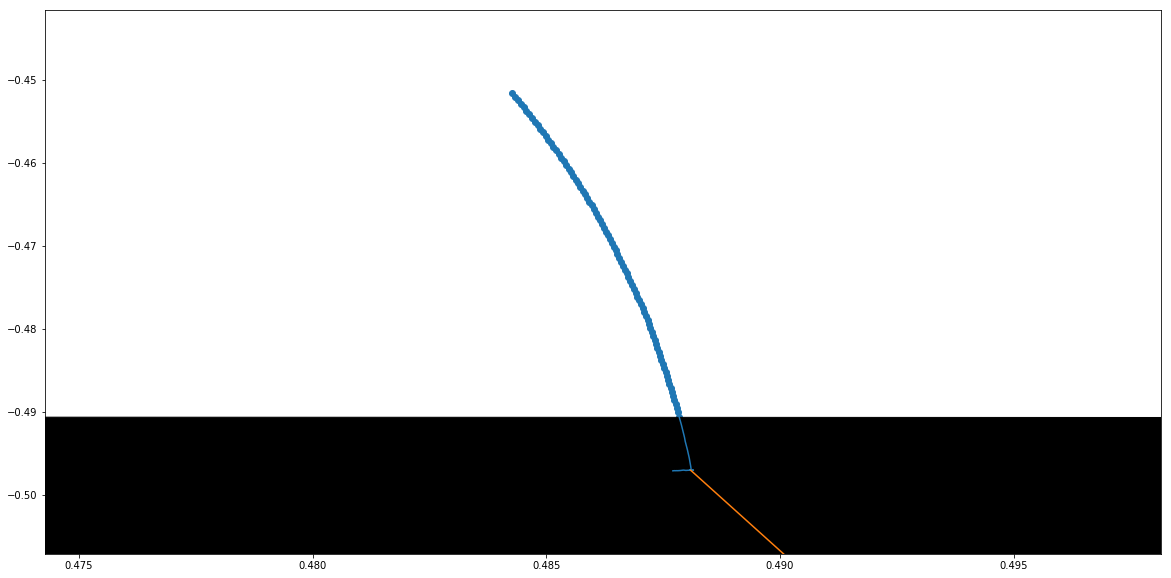

0.554025 0.563565 -1.12713 -0.07455 0.0
-0.5762574023013896 0.5735438802469858 -1.1525 -0.07455 89.95437383553924
-0.5549225755211751 -0.5635491152270012 -1.12713 -0.07455 179.9087476710785
0.5762711488547185 -0.5744643255796864 -1.1525 -0.07455 -90.13714737218598


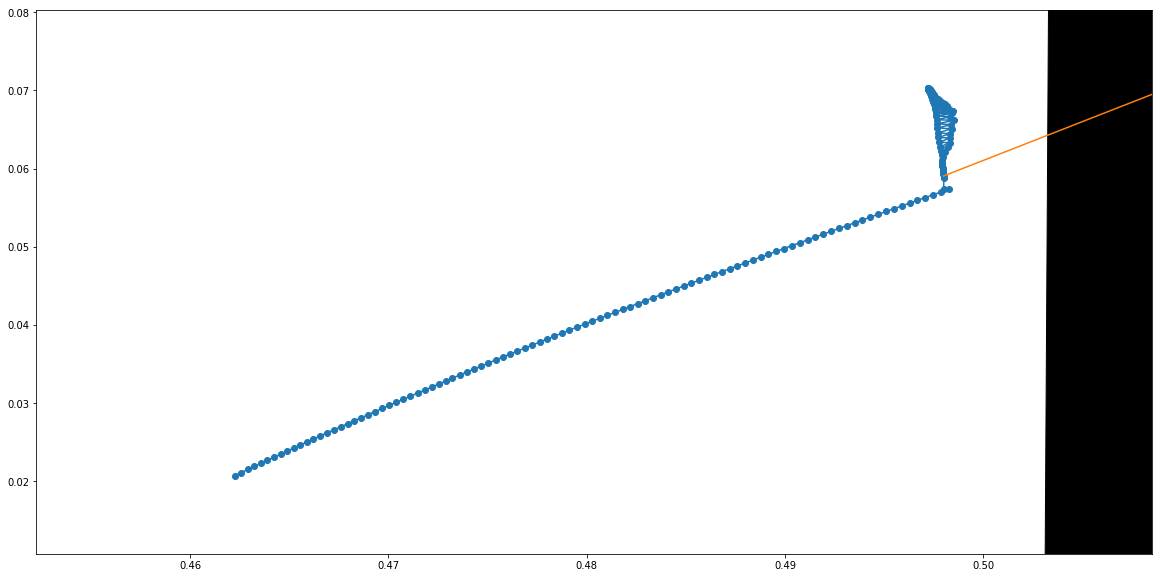

0.554025 0.563565 -1.12713 -0.07455 0.0
-0.5762574023013896 0.5735438802469858 -1.1525 -0.07455 89.95437383553924
-0.5549225755211751 -0.5635491152270012 -1.12713 -0.07455 179.9087476710785
0.5762711488547185 -0.5744643255796864 -1.1525 -0.07455 -90.13714737218598


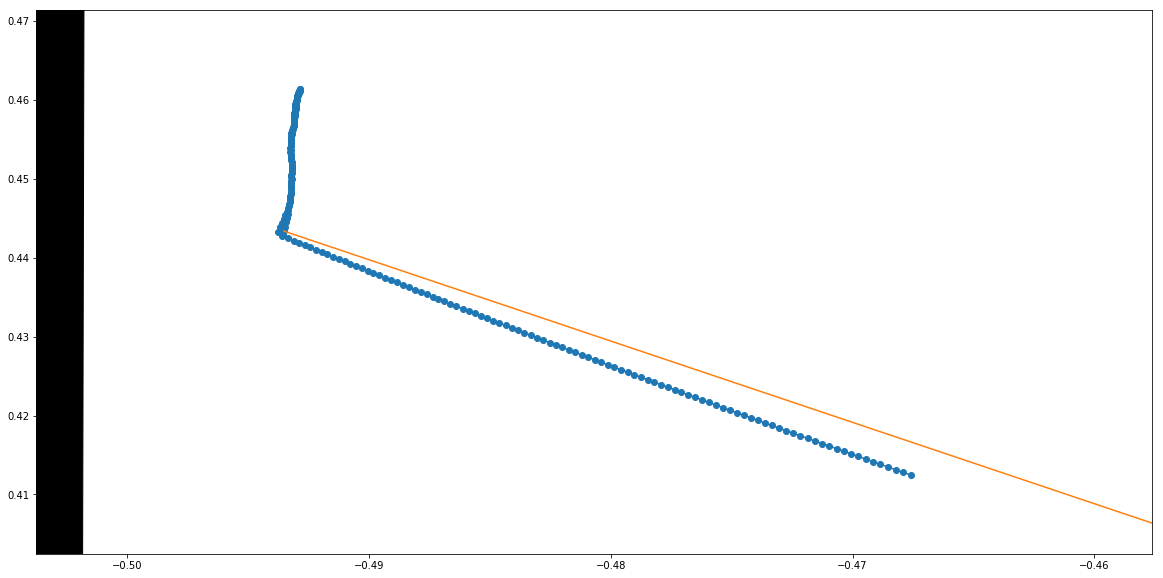

0.554025 0.563565 -1.12713 -0.07455 0.0
-0.5762574023013896 0.5735438802469858 -1.1525 -0.07455 89.95437383553924
-0.5549225755211751 -0.5635491152270012 -1.12713 -0.07455 179.9087476710785
0.5762711488547185 -0.5744643255796864 -1.1525 -0.07455 -90.13714737218598


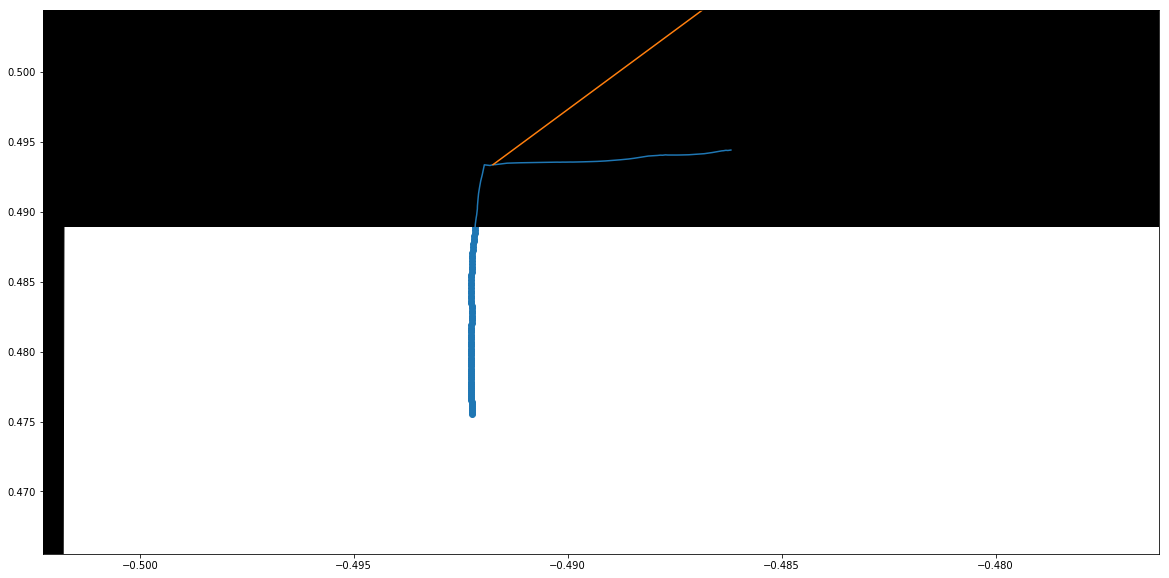

0.554025 0.563565 -1.12713 -0.07455 0.0
-0.5762574023013896 0.5735438802469858 -1.1525 -0.07455 89.95437383553924
-0.5549225755211751 -0.5635491152270012 -1.12713 -0.07455 179.9087476710785
0.5762711488547185 -0.5744643255796864 -1.1525 -0.07455 -90.13714737218598


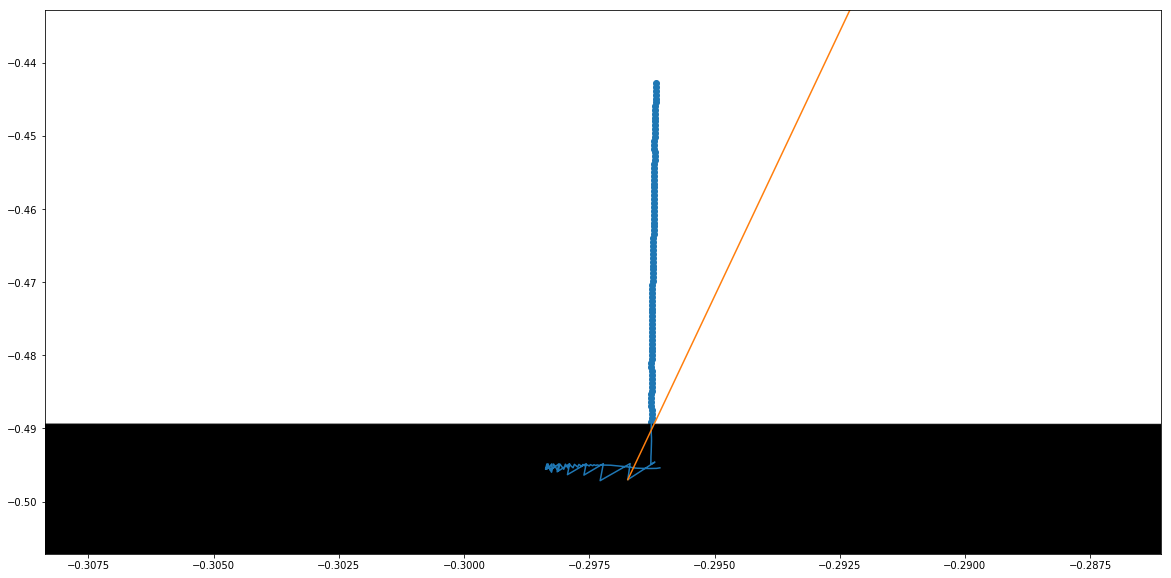

0.554025 0.563565 -1.12713 -0.07455 0.0
-0.5762574023013896 0.5735438802469858 -1.1525 -0.07455 89.95437383553924
-0.5549225755211751 -0.5635491152270012 -1.12713 -0.07455 179.9087476710785
0.5762711488547185 -0.5744643255796864 -1.1525 -0.07455 -90.13714737218598


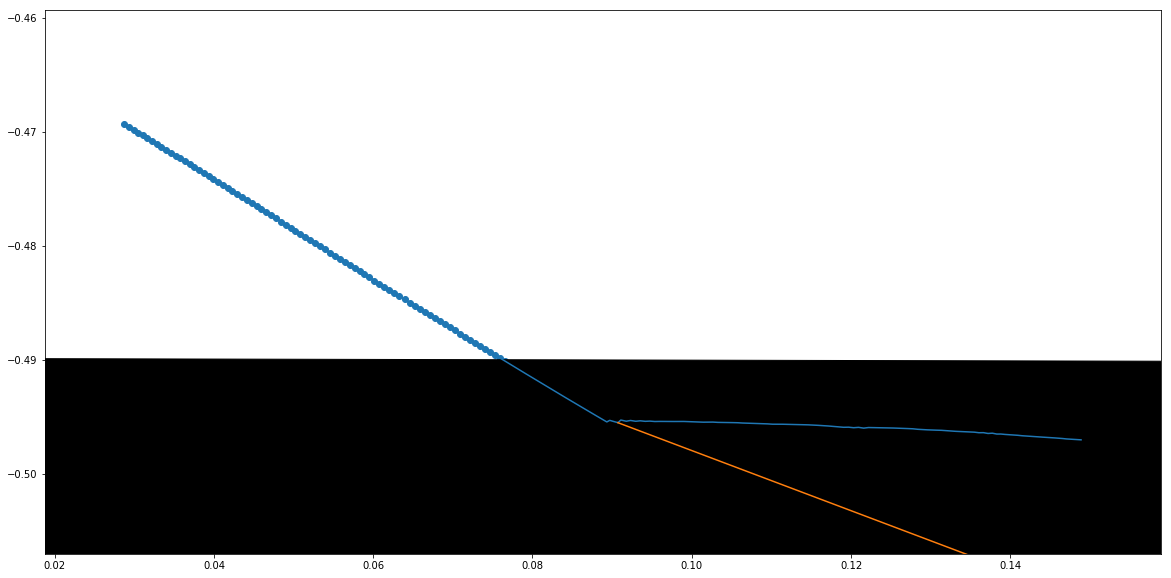

0.554025 0.563565 -1.12713 -0.07455 0.0
-0.5762574023013896 0.5735438802469858 -1.1525 -0.07455 89.95437383553924
-0.5549225755211751 -0.5635491152270012 -1.12713 -0.07455 179.9087476710785
0.5762711488547185 -0.5744643255796864 -1.1525 -0.07455 -90.13714737218598


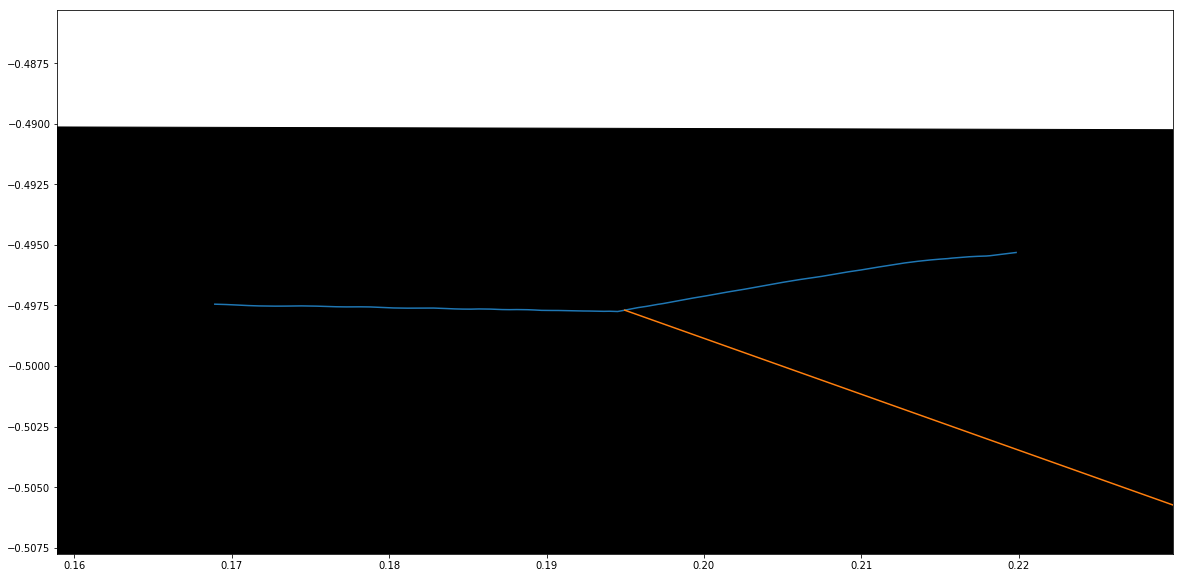

In [876]:
for i in range(NUMBER_OF_EXAMPLES):
    #Get rectangles representing environment.
    #For each of them, need a lower left starting point, width, height, and angle
    rectangles = []

    for j in boundary_df.index:
        x_l = boundary_df.at[j,'X'] - (boundary_df.at[j,'sizeX']/2) * math.cos(boundary_df.at[j,'Yaw']) - (boundary_df.at[j,'sizeY']/2) * math.sin(boundary_df.at[j,'Yaw']) 
        y_l = boundary_df.at[j,'Y'] + (boundary_df.at[j,'sizeY']/2) * math.cos(boundary_df.at[j,'Yaw']) + (boundary_df.at[j,'sizeX']/2) * math.sin(boundary_df.at[j,'Yaw']) 
        width = -boundary_df.at[j,'sizeY']
        height = -boundary_df.at[j,'sizeX'] - 0.111/2
        angle = np.rad2deg(boundary_df.at[j,'Yaw'])
        print(x_l,y_l,width,height,angle)
        rect = Rectangle((x_l,y_l),width,height,angle=angle,color='Black')
        rectangles.append(rect)
    x,y = df_in_angle.loc[rows[i],'X'], df_in_angle.loc[rows[i],'Y']
    x,y = x.tolist(), y.tolist()
    index = indexes[i]
    try:
        m_estimate = (y[POINTS_TO_TRACK] - y[POINTS_TO_TRACK-100] )/ (x[POINTS_TO_TRACK] - x[POINTS_TO_TRACK-100])
    except Exception as e:
        print(e,i)
        continue
    xl = [df.at[index,'X']]
    yl = [df.at[index,'Y']]
    angle = df.at[index,'in_angle5']
    #There can be 2 different ways of showing the bounce, so find the one that represents the bounce best
    if (abs(math.tan(angle) - m_estimate) > abs(math.tan(3.1415 - angle) - m_estimate)):
        angle = 3.1415 - angle
    
    #Convert angle to slope, add an artifical point to get an estimate of the bounce angle
    xl.append(xl[0] + 1.0)
    yl.append(yl[0] + math.tan(angle))
    #No need to keep track of rectangle of boundary, (x,y) of weaselball is at the center of the structure which is far to the boundary
    #It could be useful to make a boundary based off of the enclosure that would be made if we take the distance of the hubs to the wall
    fig, ax = plt.subplots(figsize=(20,10))
    for rect in rectangles:
        ax.add_patch(rect)
    plt.scatter(x,y)
    plt.plot(x,y)
    plt.plot(xl,yl)
    plt.xlim([np.min(x)-0.01,np.max(x)+0.01])
    plt.ylim([np.min(y)-0.01,np.max(y)+0.01])
    plt.show()
    fig.savefig(figure_DIR + 'bounceAngleVerification' + str(i))